In [1]:
#Tensoreflow Magic command
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
#Importing the required modules
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator


from sklearn.metrics import confusion_matrix
import itertools

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import pandas as pd
import cv2
import numpy as np
from glob import glob
from sklearn import preprocessing

pd.options.display.max_colwidth=150

from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

In [5]:
#Mount the google drive 
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Copy the plant seedlings dataset from google drive to google colab local.
!cp /content/gdrive/My\ Drive/Dog_Breed/* .

In [7]:
#List the files in the directory
!ls

gdrive		sample_data		   test.zip
labels.csv.zip	sample_submission.csv.zip  train.zip


In [8]:
#Unzip all the files
!unzip train.zip
!unzip test.zip
!unzip labels.csv.zip
!unzip sample_submission.csv.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/82ee3ee4dc01b33203a049c6c3338034.jpg  
  inflating: test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg  
  inflating: test/82f5fb0bdaff30a4a3374e2d9915856c.jpg  
  inflating: test/82fbff1bd375474e3d4ec5cbfde3f9f0.jpg  
  inflating: test/8301c772feb7f4068473f0157ae58f9b.jpg  
  inflating: test/8307be57a9d76c1584e16801a39cb1dc.jpg  
  inflating: test/831a38bd2cfa0a093967d5b6c1ac09dc.jpg  
  inflating: test/831ef824af939f9754e3593638933b64.jpg  
  inflating: test/8322f53b29325419ef3bcf7cf10d7172.jpg  
  inflating: test/83233e2774e116ef34a04c53dd00a282.jpg  
  inflating: test/832cae23410e741ecd2014b3818ed7c4.jpg  
  inflating: test/833f90a3652b06607b55bd25c8d97457.jpg  
  inflating: test/8341f50a86c819b3cb8828740a97e7ef.jpg  
  inflating: test/834bb31410410852082813d2e07c3290.jpg  
  inflating: test/834f6aaff5dd8f7159bc3c9afeaaead7.jpg  
  inflating: test/8356f99f79e539a97028b1e4af918c43.jpg  
  inflating: test/83600f25c6094746a9a

In [0]:
#Define the Base/Train/Test folders
Base_Data_Folder = "."
Train_Data_Folder = "train"
Test_Data_Folder = "test"

In [0]:
img_rows = 300
img_cols = 300
num_channels = 1

In [0]:
labels = pd.read_csv('labels.csv')

In [13]:
labels.nunique()

id       10222
breed      120
dtype: int64

In [14]:
#Read the images with CV2
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []
for i, img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(i),1)
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 10222/10222 [00:31<00:00, 328.90it/s]


In [16]:
#Value counts of all the breeds
labels.breed.value_counts()


scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
leonberg                          106
cairn                             106
japanese_spaniel                  105
beagle                            105
blenheim_spaniel                  102
miniature_pinscher                102
australian_terrier                102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
siberian_husky                     95
norwegian_elkhound                 95
whippet                            95
pug         

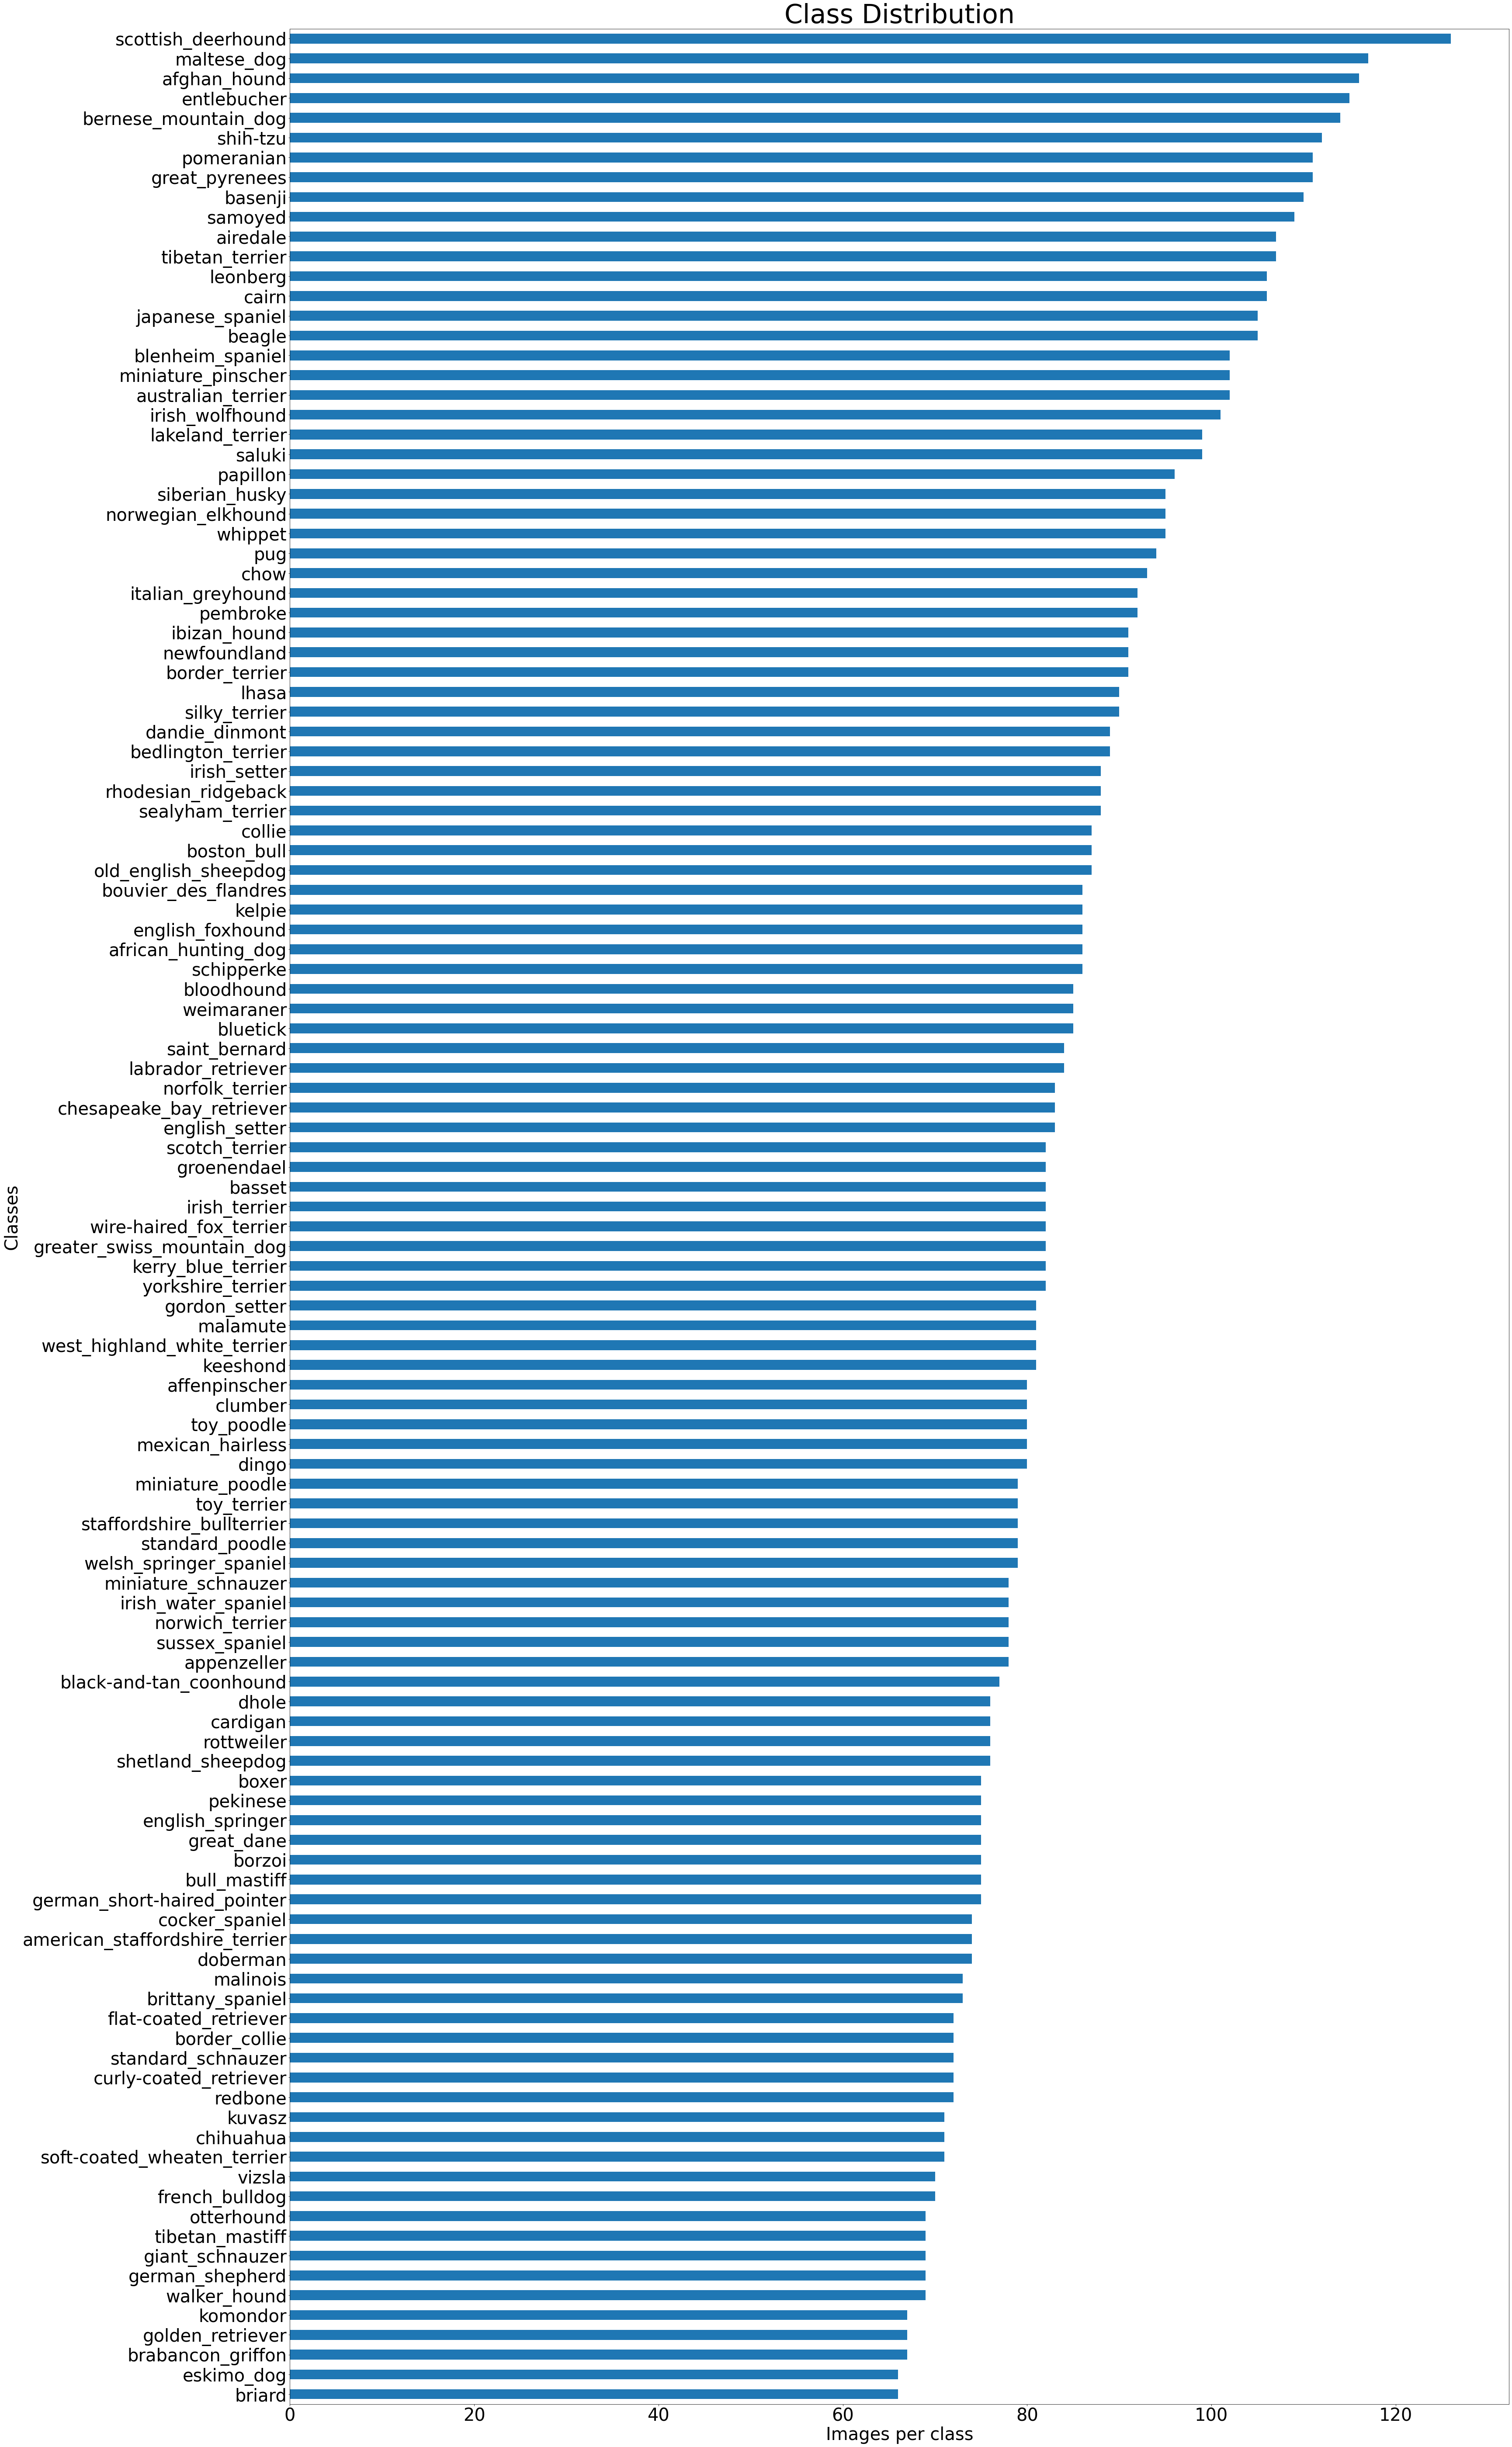

In [17]:
# Take a look at the class/breed distribution
ax=pd.value_counts(labels['breed'],ascending=True).plot(kind='barh',fontsize="40",title="Class Distribution",figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

In [18]:
#One Hot encoding of the target
img_label=y_feature
img_label=pd.get_dummies(y_feature)
img_label.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,english_setter,english_springer,entlebucher,eskimo_dog,flat-coated_retriever,french_bulldog,german_shepherd,german_short-haired_pointer,giant_schnauzer,golden_retriever,gordon_setter,great_dane,great_pyrenees,greater_swiss_mountain_dog,groenendael,ibizan_hound,irish_setter,irish_terrier,irish_water_spaniel,irish_wolfhound,italian_greyhound,japanese_spaniel,keeshond,kelpie,kerry_blue_terrier,komondor,kuvasz,labrador_retriever,lakeland_terrier,leonberg,lhasa,malamute,malinois,maltese_dog,mexican_hairless,miniature_pinscher,miniature_poodle,miniature_schnauzer,newfoundland,norfolk_terrier,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
X=np.array(x_feature)
y=img_label.values
print(X.shape)
print(y.shape)

(10222, 300, 300, 3)
(10222, 120)


In [20]:
#Train/Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8177, 300, 300, 3)
(8177, 120)
(2045, 300, 300, 3)
(2045, 120)


In [0]:
#Train and test datagenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
#Train set/ Test Set
training_set=train_datagen.flow(X_train,y=y_train,batch_size=32)
testing_set=test_datagen.flow(X_test,y=y_test,batch_size=32)

In [23]:
#CNN Model
model=Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(300,300,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(120,activation='softmax'))

model.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 302, 302, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 302, 302, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720000)            0         
______________________________________

In [24]:
#Accuracy is low for building model from scratch
history=model.fit_generator(training_set,
                       steps_per_epoch = 16,
                       validation_data = testing_set,
                       validation_steps = 4,
                       epochs = 5,
                       verbose = 1)


Epoch 1/10
16/16 [==============================] - 10s 610ms/step - loss: 7.5630 - accuracy: 0.0078 - val_loss: 4.7873 - val_accuracy: 0.0156
Epoch 2/10
16/16 [==============================] - 8s 504ms/step - loss: 4.7927 - accuracy: 0.0059 - val_loss: 4.7887 - val_accuracy: 0.0078
Epoch 3/10
16/16 [==============================] - 8s 509ms/step - loss: 4.7873 - accuracy: 0.0039 - val_loss: 4.7873 - val_accuracy: 0.0078
Epoch 4/10
16/16 [==============================] - 8s 509ms/step - loss: 4.7870 - accuracy: 0.0078 - val_loss: 4.7816 - val_accuracy: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 8s 504ms/step - loss: 4.7881 - accuracy: 0.0039 - val_loss: 4.7890 - val_accuracy: 0.0156
Epoch 6/10
16/16 [==============================] - 8s 511ms/step - loss: 4.7872 - accuracy: 0.0098 - val_loss: 4.7850 - val_accuracy: 0.0078
Epoch 7/10
16/16 [==============================] - 8s 497ms/step - loss: 4.7876 - accuracy: 0.0060 - val_loss: 4.7976 - val_accuracy: 0.0000e

In [25]:
#Import ResNet50 Model
tf.keras.backend.clear_session()
model = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(300,300,3),
                                       weights='imagenet')

94773248/94765736 [==============================] - 7s 0us/step


In [26]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
model.output

<tf.Tensor 'conv5_block3_out/Relu:0' shape=(?, 10, 10, 2048) dtype=float32>

In [28]:
len(model.layers)

175

In [0]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [30]:
#Check if layers frozen
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [31]:
model.output

<tf.Tensor 'conv5_block3_out/Relu:0' shape=(?, 10, 10, 2048) dtype=float32>

In [0]:
#get Output layer of Pre0trained model
x = model.output

#Global average pool to reduce number of features and Flatten the output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [33]:
#Output shape of Global Average Pooling
x

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(?, 2048) dtype=float32>

In [34]:
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
my_new_model.add(Dense(512,activation='relu'))
#my_new_model.add(Activation('relu'))
my_new_model.add(Dropout(0.5))
my_new_model.add(Dense(120, activation='softmax'))

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a268eb855778b3df3c7506639542a6af so we will re-download the data.
94658560/94653016 [==============================] - 7s 0us/step


In [0]:
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 300
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                             rescale=1./255.,
                             horizontal_flip=True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split=0.2)

In [0]:
labels['image'] = labels['id']+'.jpg'

In [0]:
testdf=pd.read_csv('sample_submission.csv')

In [0]:
testdf['image'] = testdf['id']+'.jpg'

In [39]:
train_generator=datagen.flow_from_dataframe(
                        dataframe=labels,
                        directory="./train",
                        x_col="image",
                        y_col="breed",
                        has_ext=False,
                        subset="training",
                        batch_size=32,
                        seed=50,
                        shuffle=True,
                        class_mode="categorical",
                        target_size=(image_size, image_size))

Found 8178 validated image filenames belonging to 120 classes.


In [40]:
valid_generator=datagen.flow_from_dataframe(
                        dataframe=labels,
                        directory="./train",
                        x_col="image",
                        y_col="breed",
                        has_ext=False,
                        subset="validation",
                        batch_size=1,
                        seed=42,
                        shuffle=True,
                        class_mode="categorical",
                        target_size=(image_size, image_size))

Found 2044 validated image filenames belonging to 120 classes.


In [41]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
                            dataframe=testdf,
                            directory="./test",
                            x_col="image",
                            y_col=None,
                            has_ext=False,
                            batch_size=1,
                            seed=42,
                            shuffle=False,
                            class_mode=None,
                            target_size=(image_size, image_size))

Found 10357 validated image filenames.


In [0]:
my_new_model.layers[0].trainable = False

my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
my_new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               61560     
Total params: 24,698,360
Trainable params: 1,110,648
Non-trainable params: 23,587,712
_________________________________________________________________


In [44]:
STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=valid_generator.n

print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

my_new_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=3
)

8178
2044
Epoch 1/3
8178/8178 [==============================] - 4963s 607ms/step - loss: 1.1929 - accuracy: 0.6868 - val_loss: 4.8123 - val_accuracy: 0.0083
Epoch 2/3
8178/8178 [==============================] - 5008s 612ms/step - loss: 0.4341 - accuracy: 0.8698 - val_loss: 5.9998 - val_accuracy: 0.0083
Epoch 3/3
8178/8178 [==============================] - 5025s 614ms/step - loss: 0.2999 - accuracy: 0.9113 - val_loss: 6.5816 - val_accuracy: 0.0093
